In [1]:
# 数据清洗专题—————缺失值的处理

In [2]:
# 在Day2中，我们用 isnull().sum()函数计算了文件中每一列的缺失值并且返回了一个Series(包含列名和每一列的缺失值)

# Day6中我们来学习怎么来处理这些缺失值。学习并实践处理数据集中“不完美”部分的常用方法，重点解决我们在 Day 2 诊断出的 director、cast、country 等列的大量缺失值问题。

# 为什么要学着处理这些缺失值?如果不解决这些缺失值的问题，会对我们的统计结果造成相当大的偏差。————如day5中的country_counts。country的缺失值高达800多个。

In [3]:
import pandas as pd
import matplotlib.pyplot as plt ##记住是 matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.ticker as mticker

df = pd.read_csv('netflix_titles.csv')

df.info()

country_count_missing = df['country'].isnull().sum()
#Why the result of function .sum() is different with the return result of DAY 2
#为什么sum返回的结果和第2天的sum返回的结果不一样
#因为这里是对筛选出的country一维列表(series)上进行计数，最后的结果返回数字
country_count = df['country'].value_counts().sum()
#统计某一列中，不同值（类别）的数量
#value_counts()返回一个带标签(同时也是索引Index)的一维数组，Index为列名，计算Df中<某一列>不同种类的数量，值（value）为统计的数量
#value_counts()的默认排序规则：按“计数值”降序排列


print(f'国家内容统计的缺失值数量为：{country_count_missing}。')
print(f'统计到的国家数量为：{country_count}')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
国家内容统计的缺失值数量为：831。
统计到的国家数量为：7976


In [4]:
missing_counts = df.isnull().sum().reset_index()
print(missing_counts)
#这里对Data Frame的形式进行sum操作，返回的则是一个series(sum函数的降维操作——Dimensionality reduction operation)

           index     0
0        show_id     0
1           type     0
2          title     0
3       director  2634
4           cast   825
5        country   831
6     date_added    10
7   release_year     0
8         rating     4
9       duration     3
10     listed_in     0
11   description     0


C:\Users\AllblueLEO\AppData\Local\Temp\ipykernel_7364\1622089989.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna('Unknown',inplace = True)   #na-----Not Availible


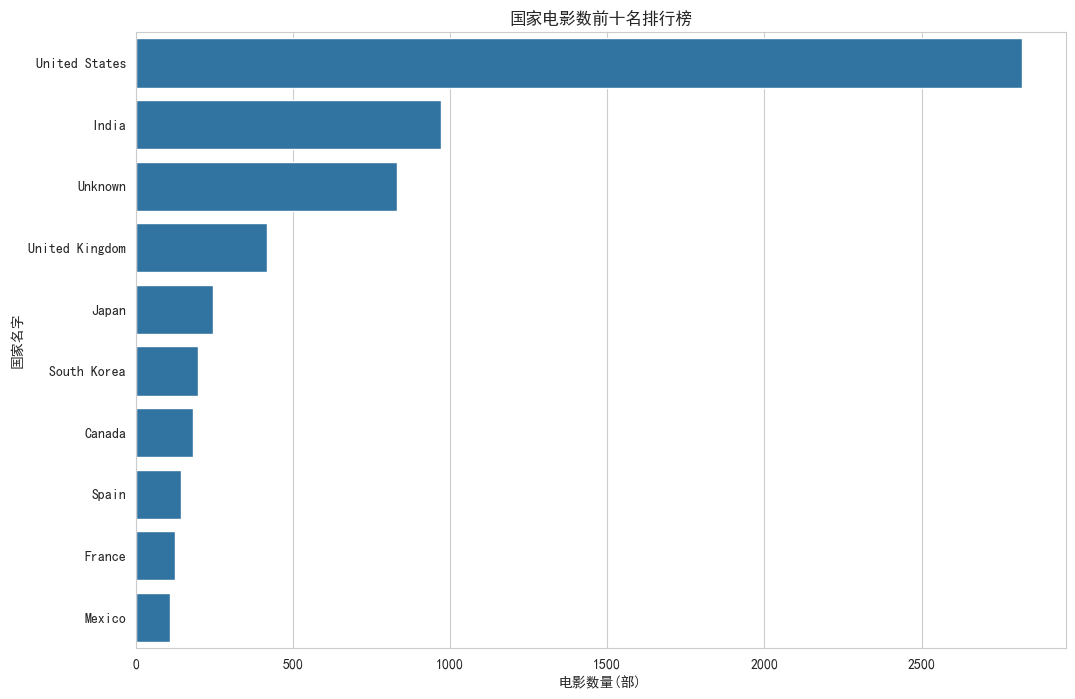

In [5]:
## 用fillna()填充缺失值

df['country'].fillna('Unknown',inplace = True)   #na-----Not Availible

df['country'].value_counts()
#可以看到Unknown被填充到了Country列的缺失部分

#开始作图

country_counts = df.groupby('country')['show_id'].count().reset_index().sort_values(by='show_id',ascending = False)

country_counts.rename(columns={'show_id':'content_counts'},inplace= True)

Top10_ten_country = country_counts.head(10)

sns.set_style('whitegrid')
# 设置全局字体为 SimHei (黑体) 或其他中文字体(避免中文在图表中显示不出来的问题)
plt.rcParams['font.sans-serif'] = ['SimHei']  # 或 ['Microsoft YaHei'] 微软雅黑 等
plt.rcParams['axes.unicode_minus'] = False   # 解决负号 '-' 显示为方块的问题
#重新设置字体需要在sns设置风格之后，避免被重覆盖

plt.figure(figsize=(12,8))

sns.barplot(x='content_counts',y='country',data = Top10_ten_country)

plt.title('国家电影数前十名排行榜',fontsize =12)
plt.xlabel('电影数量(部)',fontsize=10)
plt.ylabel('国家名字',fontsize= 10)

plt.show()


In [6]:
#数据缺失策略(Strategy)之一  ————  删除(Delete)
#1.当数据集非常大，但是整体的文件只缺失了几行（或者不太多）数据的情况
#使用 .dropna() 直接删除行
#优点：快准狠 
#缺点：如果缺失值很多，会丢失大量有价值的数据，让你的样本量急剧减少。在我们的Netflix项目中，如果这样做，会损失近30%的数据，是绝对不可取的。
#######举例:
# Netflix 案例：我们的 rating（评级）和 date_added（添加日期）这两列，各自只缺失了不到 20 行数据。
# 相对于 8807 行的总量来说，这是非常小的一部分（<0.3%）。如果我们不关心这十几部作品，最快的方法就是直接删除这些行：
df_clean = df.dropna(subset=['rating','date_added'])  # (df.dropna(subset = ['',''])) #删除数据集中的子集（某些需要的特征）的空值
df_clean.info()
#也可以直接Inplace = True方法直接替换
#df.dropna(subset=['rating','date_added'],inplace = True)
#df.info()

#2.当数据集中的某一个特征(列)缺失太多的值（如超过70-80%）时
#使用.drop()直接删除列，因为此时这个列基本没用
#优点：可以剔除掉无效的特征，简化模型
#缺点：可能会丢掉一个潜在有用的基本维度
#######举例:
# 假设有 'awards_won' 这一列 99%的数值缺失
# df_cleaned = df.drop(columns=['awards_won'])  #删除整列——df.drop(column=[''])

<class 'pandas.core.frame.DataFrame'>
Index: 8793 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8793 non-null   object
 1   type          8793 non-null   object
 2   title         8793 non-null   object
 3   director      6172 non-null   object
 4   cast          7968 non-null   object
 5   country       8793 non-null   object
 6   date_added    8793 non-null   object
 7   release_year  8793 non-null   int64 
 8   rating        8793 non-null   object
 9   duration      8790 non-null   object
 10  listed_in     8793 non-null   object
 11  description   8793 non-null   object
dtypes: int64(1), object(11)
memory usage: 893.0+ KB


In [7]:
#数据缺失策略(Strategy)之二  ———— 填充法 (Imputation) - “精雕细琢”
#用更合理的数据填充缺失值，这是更常用，更流行的方法

In [8]:
# 1.填充分类数据(categorical data)

#方法一：填充固定值(constant value)  ----- Like Unknown
#什么时候用：当你认为“缺失”本身就是一种需要被分析的状态时。这是处理 country, director 这种文本信息的最佳实践之一
#填充Unknown量化数据，让结果更清晰更容易展现，后面更好处理数据
#######举例:
#填充Country的Unknown

#方法二: 填充众数(Mode————出现数目最多的统计值)
#什么时候用：当你可以合理地假设，那些未知的数据很可能和大部分数据是一样的时候。
#优点：操作简单，保持了数据的分布。
#缺点：如果众数非常集中，可能会加剧数据的偏斜。“众数非常集中”就是指数据已经严重“一边倒”
#相比之下，我们用的 fillna('Unknown') 就诚实得多，它清晰地告诉我们：“有 9.4% 的数据（831 / 8807）是我们不知道的”，这本身就是一个更准确、更宝贵的洞察。
#######举例:
#purchase_plan（用户购买的套餐类型），有 "Basic", "Standard", "Premium" 三种。
#假设 "Standard" 是众数（占比45%），而有 2% 的数据缺失了。
#众数占比大，而缺失值不大，可以假设缺失值都是众数值
# mode_plan = df['purchase_plan'].mode()[0]  # 得到 'Standard'
# [0] 是一个 索引器 🎯，它用来从 .mode() 返回的结果中，提取 第一个 值。 因为一组数据中众数可能存在多个
# df['purchase_plan'].fillna(mode_plan, inplace=True)

In [9]:
# 2.填充数值型数据(Numerical Data)

# 类型一:Mean平均值

#######举例:
#Netflix 案例：我们的数据集中没有特别好的数值缺失例子（因为 release_year 是完整的）。
#我们来假设 release_year（上映年份）有500个缺失值。
#  release_year_mean = df['release_year'].mean()
#  df['release_year'].fillna(release_year_mean，replace = True)


# 类型二:Median中位数
#######举例:
# 假设release_year 有缺失



# 做法：计算所有已知年份的中位数，比如是 2017 年。
# 分析：2017 是一个真实的年份，而且中位数不受极端老电影（比如1925年）的影响，更能代表“中间水平”。
# 这是处理这种数值缺失时更稳健、更常用的方法。
# median_year = df['release_year'].median() # 得到 2017.0
# df['release_year'].fillna(median_year, inplace=True)

# 如何选择 中位数和平均值的填充？？
# 选择的唯一标准是：看这列数据的“分布形态”，具体来说，就是看它有没有“极端异常值”（Outliers）

# 一个简单的“黄金法则”：
#数据“长得丑”（有极端值，分布不对称），用中位数 (Median)。

#数据“长得帅”（没有极端值，分布对称），用平均值 (Mean)。

#在犹豫不决时，永远选择中位数 (Median)， 因为它更“稳健”，不容易出错。


In [ ]:
# 3高级法 (Advanced Methods) - “专家会诊”

#当数据非常重要，且缺失模式很复杂时，我们会用更高级的模型来预测缺失值。

# K近邻填充 (KNN Imputer)：它会找到和缺失数据行最相似的 K 个邻居，然后用这 K 个邻居的平均值来填充。

# 模型预测填充 (Model-based Imputation)：我们可以把有缺失值的列当作“目标变量(y)”，把其他所有列当作“特征(X)”
# 然后训练一个预测模型（比如线性回归、随机森林），用这个模型来预测缺失值应该是什么。

#例子：比如，你丢失了用户的 age（年龄）。你可以用机器学习，根据用户的“购买品类”、“入会时长”、“所在城市”等其他所有特征，去**“预测”**出一个最可能的年龄。
#在真实业务中，只有在数据质量要求极高的建模场景下才会使用。